# 第六章 梯度下降法（Gradient Descent）
### 并非机器学习算法，而是优化搜索的方法
#### 如：梯度下降法（最小化损失函数）、梯度上升发（最大化效用函数）

对于二维来说，横轴是参数theta，纵轴是损失函数J的取值，将J对theta的导数（梯度）代表了J增大的方向（本质上是在刻画theta的单位变化带去的J的变动），再加入一个步长eta。对于高维，则是由多个偏导数构成一个梯度。

<a href="https://www.codecogs.com/eqnedit.php?latex=-\eta&space;\frac{dJ}{d\theta&space;}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?-\eta&space;\frac{dJ}{d\theta&space;}" title="-\eta \frac{dJ}{d\theta }" /></a>

其中，eta被称作学习率（Learning rate），是一个超参数，eta的取值会影响获取最优解的速度，并且倘若eta的取值不合适甚至会得不到最优解。当eta太小，收敛的速度太慢；当eta太大，甚至会导致不收敛。

需要注意：不是所有函数都会由唯一极值点，找到局部最优点但不一定是全局最优解。
解决方法：梯度下降的初始点也是超参数，可以多次运行，随机化初始点。

#### 以下主要以在线性回归中最小化损失函数为例
线性回归最小化损失函数具有唯一解


### 梯度下降法模拟

In [2]:
import numpy as np
import matplotlib.pyplot as plt

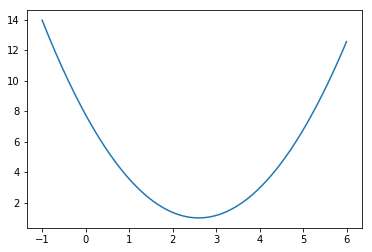

In [4]:
# 此处x为参数theta，y为目标函数J
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.6)**2 + 1
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
# 重要的步骤：对于J函数求导
def dJ(theta):
    return 2*(theta-2.6)

# 求出当前的目标函数值位置
def J(theta):
    return (theta - 2.6)**2 + 1